# PHAS0030: Computational Physics: Mini-Project: Ant Optimisation:
## (Go to the Ant .... Consider her Ways and be Wise)
#### SN:19052055

#### Note:
This notebooks contains the extracts from my logbook that run the final code: full exploration of the found in my logbook

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

#### Defining function to return path from point to point
- To save time can use equation for straight line to make paths along grid, points have to be chosen carefully if a diagonal path.

In [2]:
# 21/02/21

def ptp(r0, rf):
    '''Returns path from point to point
    Input:
    r0  Tuple of start of path , form (y,x)
    rf  Tuple of end of path , form (y,x)'''
    
    # Extractin x and y positions
    y0, x0 = r0
    yf, xf = rf
    
    # If x difference is greater than y change, use x difference number points in path
    if abs(yf-y0) <= abs(xf-x0):
        d = abs(xf-x0)+1
    
    # If y change is greater than x change, use that number points in path
    else:
        d = abs(yf-y0)+1
    
    # Create arrays of the x and y values for the tuples along path
    # As we ensure the biggest difference is used we ensure we dont miss any grid points
    # We ensure the arrays are integers, if one difference is much smaller than other we get duplicates of values
    # Given steeper or shallow gradient, but point always connected, if difference of one is zero, gives array of 0
    y = np.linspace(y0, yf, d, dtype= int)
    x = np.linspace(x0, xf, d, dtype= int)
    
    line=[]
    # Joins the x and y array to get list of cells in path
    for i in range(d):
        line.append((y[i],x[i]))
    
    return tuple(line)

## Simple model/ MST code :

#### Simple MST path choosing function/ transition rule
- New function raise pheromone level to factor alpha, this can be used to alter the distribution- making it closer to 50/50 at begin. Probability,$ P$, of a choosing a path, $ij$, is a function of the pheromone strength,$\tau$, of first cell in the path is given by:

$$P_{ij} = \frac{\tau_{ij}^\alpha}{\sum_k^{N_i}\tau_{ik}^\alpha}$$

In [3]:
# 19/02

def path_choice(site, grid, alpha):
    ''' Chose path for ant to move along based on pheromone,
    Input:
    site-   Site dictionary containing pos and paths out
    grid-   The grid array cointaining pheromone
    alpha-  Factor which skew distribution  '''
    
    # Initialising the options and probability arrays
    opt= []
    prob= []

    # Loops for the paths in the site dictionary given: 
    # As they are numbered paths go from 0 to size of site dictionary minus one( as only contains paths and pos)
    for path in range(len(site)-1):               
        # Appends the the path to opt and pheromone level in the first step of path to prob
        opt.append(path)
        prob.append( (grid[site[path][1]])**alpha )
     
    # Normalises the pheromones to one to give a probability
    p= (prob)/sum(prob)
    #print(p)
    
    # Picks move probablisitcally
    move= opt[np.random.choice(len(opt),p=p)]

    return move

#### Creating a function  colony of ants
- Sets up function to add N ants at node 'pos' in sites dictionary: This will be a nested dictonary of ants 0-N, they will each have a dictonary containing there number, positon and path they'll follow. This can then be used to update the ants position based on path dictonary array.

In [4]:
def add_colony(colony, N, pos, sites):
    '''Adds N ants at node 'pos' in sites dictionary, to the colony dictonary: 
    This will be a nested dictonary of ants 0-N, they will each have a dictonary containing there number, 
    positon and path they'll follow''' 
    
    # Loop adding N ants to the dictonary, finds size of existing colony array and adds N
    for n in range(len(colony), len(colony) + N):
        colony[n] = { 
            'ant'   : n ,
            'pos'   : sites.get(pos)['pos'],
            'path'  : ()} 
    
    return colony

### Simple MST code, with animation

KeyboardInterrupt: 

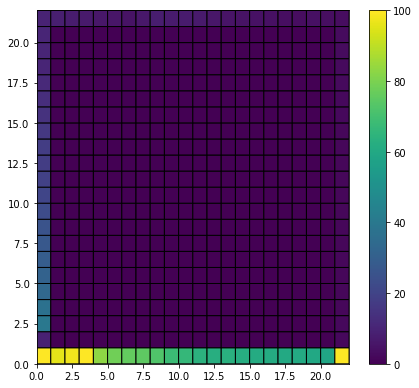

In [5]:
# 20/02/21

# Initialising grid
grd_x= 22
grd_y= 22
grid = np.zeros([grd_y,grd_x])

# Initialising path- use tuples as easier to use to index, in form (y,x)
# Alternative paths
#short = ptp((0,0),(21,21))
#long  = ptp((0,0),(21,0))+ptp((21,0),(21,21))[1:]

short = ptp((0,0),(0,21))
long  = ptp((0,0),(21,0))+ptp((21,0),(21,21))[1:-1]+ptp((21,21),(0,21))[:]

# Initialising pheromone variables
phero   = 1
pmax    = 100
pdiff   = 0.9 
pdeprss = 40
# Depression factor based on longest path, used to set alpha for path picking

# Can also use a set alpha value instead
alpha = 1.0

# Initialising time variables
dt  = 0.001
t_T = 150
t   = 0

# Initialise tolerence variables
solved = False
solution = 'null'
tol = 0.9

# Initialising sites array with positions and arrays of paths away
sites = {'nest': {
         'pos' : short[0],
          0    : short,
          1    : long },  

         'food': {
         'pos' : short[::-1][0],
          0    : short[::-1],
          1    : long[::-1] } }

# Setting pheromone on grid for paths in sites, and set site positions to max pheromone
for values in sites.values():
    for paths in range(len(values.keys())-1):
        for i in values[paths]:
            grid[i]= phero
        
    grid[values['pos']]= pmax    

# Setting up ant colony for Nants ants 
Nants  = 100
colony = add_colony({}, Nants, 'nest', sites)


while t < t_T and solved == False:
    # Counts time
    t += 1
    print(t)
    
    # Adds ant each tick
    colony = add_colony(colony, 1, 'nest', sites)
    
    # Reduces pheromone level by diffusion rate
    grid *= pdiff       
    
    # Ensures site positions are pheromone max
    grid[sites['nest']['pos']]= pmax
    grid[sites['food']['pos']]= pmax

    # Loops for all ants
    for n,ant in colony.items():
        # For all sites 
        for site in sites.values():
            # If ant is at the site
            if ant['pos'] == site['pos']:                  
                # Picks next path
                nxt_path = path_choice(site, grid, t/pdeprss)
                
                # Set ants new path and position
                ant['path'] = site[nxt_path]
                ant['pos']  = site[nxt_path][1]
                
                # Increase pheromone for cell  ant is in now, limit to make pheromone
                if grid[ ant['pos']]< pmax:
                    grid[ ant['pos']]+= phero   
        
        # Otherwise, if not at site position updates to next position in ants path
        # Finds index in the path, the ant is at and adds one
        indx= ant['path'].index(ant['pos'])
        nxt_indx= indx + 1
        
        # Update ant position to the next index position 
        ant['pos'] = ant['path'][nxt_indx]
        
        # Updates pheromone, limit to max level
        if grid[ ant['pos']]< pmax:
            grid[ ant['pos']]+= phero 
       
    # Plots grid 
    clear_output(wait=True)
    
    fig, ax= plt.subplots(1, 1, figsize=(7,6.5)) 
    im= ax.pcolor(grid, edgecolors='k', linewidths=1, vmin=0, vmax= pmax)
    cbar= fig.colorbar(im) 
    
    plt.draw()
    plt.pause(dt)
    
    # Sums pheromone of grid along the path
    density_s = sum( map(lambda x: grid[x], sites['nest'][0][1:-1]) ) / len( sites['nest'][0][1:-1] )
    density_l = sum( map(lambda x: grid[x], sites['nest'][1][1:-1]) ) / len( sites['nest'][1][1:-1] )
    
    density_T = (density_s+density_l)
    
    print(density_s, density_s/density_T )

    # If the density of  short path  is above percentage tolerance of the pheromone over both paths, 
    # If the average pheromone is over half the max pheromone on the grid stops loop
    if density_s/density_T > tol and density_s > pmax*0.5:
        solved   = True
        solution = 'short'

    # Same for long path
    if density_l/density_T > tol and density_l > pmax*0.5:   
        solved   = True
        solution = 'long'

print('Optimam path', solution,'. Found in',t,'s')

### MST code functionalised for loops:


In [6]:
def AntOptimisation(x0, y0, grd_x, grd_y, phero, pmax, pdiff, pdeprss, t_T, tol, Nants, add_ants):
    '''Function to evaluate two path system using depression value for the probability function.
    Takes in the various variables
    Returns:
    solved-    Boolean for if solution is found 
    solution-  The solution that is found(long/short)
    t-         Time taken
    grid-      The grid array at end of simulation'''
    
    # Initialising grid
    grid = np.zeros([grd_y,grd_x])

    # Initialising path- use tuples as easier to use to index, in form (y,x)
    short = ptp((0,0),(y0,x0))
    long  = ptp((0,0),(y0,0)) + ptp((y0,0),(y0,x0))[1:]

    # Initialising time variables
    dt  = 0.001
    t   = 0
    solved = False
    solution = 'null'

    # Initialising sites array with positions and arrays of paths away
    sites = {'nest': {
             'pos' : short[0],
              0    : short,
              1    : long },  

             'food': {
             'pos' : short[::-1][0],
              0    : short[::-1],
              1    : long[::-1] } }

    # Setting pheromone on grid for paths in sites, and set site positions to max pheromone
    for values in sites.values():
        for paths in range(len(values.keys())-1):
            for i in values[paths]:
                grid[i]= phero

        grid[values['pos']]= pmax    

    # Setting up ant colony for Nants ants 
    colony = add_colony({}, Nants, 'nest', sites)


    while t < t_T and solved==False :
        # Counts time
        t += 1
        #print(t)

        # Adds ant each tick
        colony = add_colony(colony, add_ants, 'nest', sites)

        # Reduces pheromone level by diffusion rate
        grid *= pdiff       

        # Ensures site positions are pheromone max
        grid[sites['nest']['pos']]= pmax
        grid[sites['food']['pos']]= pmax

        # Loops for all ants
        for n,ant in colony.items():
            # For all sites 
            for site in sites.values():
                # If ant is at the site
                if ant['pos'] == site['pos']:  
                    # Picks next path
                    nxt_path = path_choice(site, grid, t/pdeprss)

                    # Set ants new path and position
                    ant['path'] = site[nxt_path]
                    ant['pos']  = site[nxt_path][1]

                    # Increase pheromone for cell  ant is in now, limit to make pheromone
                    if grid[ ant['pos']]< pmax:
                        grid[ ant['pos']]+= phero   

            # Otherwise, if not at site position updates to next position in ants path
            # Finds index in the path, the ant is at and adds one
            indx= ant['path'].index(ant['pos'])
            nxt_indx= indx + 1

            # Update ant position to the next index position 
            ant['pos'] = ant['path'][nxt_indx]

            # Updates pheromone, limit to max level
            if grid[ ant['pos']]< pmax:
                grid[ ant['pos']]+= phero 

        density_s = sum( map(lambda x: grid[x], sites['nest'][0][1:-1]) ) / len( sites['nest'][0][1:-1] )
        density_l = sum( map(lambda x: grid[x], sites['nest'][1][1:-1]) ) / len( sites['nest'][1][1:-1] )
        density_T = (density_s+density_l)
        #print(density_s/density_T )

        if density_s/density_T > tol and density_s >pmax*0.5 :
            solved   = True
            solution = 'short'

        if density_l/density_T > tol and density_l >pmax*0.5 :
            solved   = True
            solution = 'long'

    return solved, solution, t, grid

## Further TSP code

#### Function to set up dictionaries of sites for the graph containing nodes and edges
- Setting up a function which takes a list of nodes(locations) and a string list of edges(links) between them, and sets up a dictonary of nodes and edges, this will be used to set up site dictonary of the network as sets up the links with minimal input
- The site dictonary will contain path locations and paths out of the node.

In [7]:
# 22/02/21
def graph(loc, links):
    '''Takes list of nodes(locations) and a string list of edges(links) between them, and sets up a dictonary of nodes
    with their positions and edges specify paths. 
    
    Inputs:
    loc     Ordered array of node location as tuples, ie node0 in 0th position in form (y,x)
    links   String list of connections between nodes in form, node0_1, where 0 would be the start node and 
            1 would be the end node. Condition for string must be in form node0_1
            
    Outputs:
    graph   Dictionary containing all nodes and their positions, and the edges out'''
    
    graph = {} 
    for i in range(len(loc)):
        # Adds to dictonary item as string of form node0 where 0 is the node no
        # The value of each item is another dictonary with first item is their pos
        graph['node'+str(i)] = {'pos' : loc[i]}

    for l in links:
        # Links should be in form node0_1(as long as it ends in 0_1), so take  last 3 letters and remove underscore
        # This gives sting of two numbers, the start node then end node, this are then used in ptp function
        nd1 = l[4:].replace('_', ' ')
        nd = nd1.split()
 
        # Set item of sub dictonary for each node as path from start to end point extracted above
        # Using the string produced to call start and end point into ptp function,  
        # Used sting addition to call pos of items from the dictonary itself; 
        # Note: `graph['nd'+nd[i]]['pos']` gives position of node nd[i], i={0,1}
        
        # Update 'node'+nd[0] (start node) of graph dictonary, by adding ['node'+nd[1] (end node)
        # The value of which is the path from start to end, 
        graph['node'+nd[0]]['node'+nd[1]] = ptp(graph['node'+nd[0]]['pos'], graph['node'+nd[1]]['pos'] )
        
        # Update 'node'+nd[1] (end node) of graph dictonary, by adding ['node'+nd[0] (start node)
        # The value of which is the reverse path- end to start 
        graph['node'+nd[1]]['node'+nd[0]] = graph['node'+nd[0]]['node'+nd[1]][::-1]
        
        # Thus each node has edges to another node, set as the node its going to
    
    return graph 

#### Changing ant colony dictionary
- For TSP will need to keep not of the sites the ant has  yet to visit, the start node and the stops/ cells the ant has been to during its tour, as to retrace its path.

In [8]:
# 01/03/21

def add_colony_SM(colony, N, node, sites):
    '''Adds N ants at node 'pos' in sites dictionary, to the colony dictonary: This will be a nested dictonary of ants 
    0-N, they will each have a dictonary containing:
    
    Pos     The current position of the ant, tuple (y,x), at start will be the site they are initialised to
    Start   The start position of the ant, tuple (y,x), remaining unchanged
    Stops   List of tuples (y,x) of cells the ant has visited (not including sites)
    Path    The tuple list of tuples the ant will follow
    Index   The ants position in its path
    Sites   The sites the  ant is yet to visit
    
    Inputs:
    Colony  The colony dictonary to add ants to, can be empty or already populated
    N       Number of ants to add
    Node    The start node the ant begins at
    Sites   Sites dictonary containing all sites and paths '''
    
    # Loop adding N ants to the dictonary, finds size of existing colony array and adds N    
    for n in range(len(colony), len(colony) + N):
        colony['ant '+ str(n)] = { 
            'pos'   : sites.get(node)['pos'],
            'start' : sites.get(node)['pos'],
            'stops' : [sites.get(node)['pos']],
            'path'  : (),
            'index' : 0,
            'sites' : list (sites.keys()) } 
    
    return colony

#### Editing path sellection:
- Adding condition to take into account heristic path length of option as folows:

- In order to satisfy the constraint that an ant visits all the n different sites, each ant has a list containing the unvisited sites, we therefore will weight the ants probability to visit new sites before a tour have been completed. When a tour is completed, list is then emptied and the ant is free again to choose.

- We define visibility, $\eta_{ij}$, as the quantity $\frac{1}{d_{ij}}$ where $d_{ij}$ is the distance between site $ij$. From this we define the probability, $P_{ij}$ , of choosing edge from site $i$ to site $j$ for the $k^{th}$ ant as the normalised product of the visability $\eta_{ij}$ and the pheromone in the first cell of path $ij$, $\tau_{ij}$, giving the following equation; 

$$P_{ij}^k =\Bigg\{ \begin{matrix}\frac{\gamma\left(\tau_{ij}^\alpha\right)\cdot\left(\eta_{ij}^\beta\right)}{ \underset{k \in allow_k}{\sum} \gamma \cdot \left(\tau_{ij}^\alpha\right)\cdot\left(\eta_{ij}^\beta \right) + \underset{k \notin allow_k}{\sum} \left(\tau_{ij}^\alpha\right)\cdot\left(\eta_{ij}^\beta\right)} & for \quad j \in allowed_k \\
\frac{\left(\tau_{ij}^\alpha\right)\cdot\left(\eta_{ij}^\beta\right)}{ \underset{k \in allow_k}{\sum} \gamma \cdot \left(\tau_{ij}^\alpha\right)\cdot\left(\eta_{ij}^\beta \right) + \underset{k \notin allow_k}{\sum} \left(\tau_{ij}^\alpha\right)\cdot\left(\eta_{ij}^\beta\right)} & otherwise  \end{matrix}$$

- where $allowed_k$ is the list of sites $i$ not visited and where $\alpha$ and $\beta$ are parameters that control the relative importance of pheromone versus visibility. 


- Therefore the transition probability is a trade-off between visibility (which says that close towns should be chosen with high probability, thus implementing a greedy constructive heuristic) and trail intensity at time t (that says that if on edge (i,j) there has been a lot of traffic then it is highly desirable, thus implementing them autocatalytic process).


In [9]:
# 01/03/21

def path_choice_SM(site, ant, grid, alpha, beta, gamma):
    ''' Chose path for ant to move along based on pheromone and path length,
    
    Input:
    site-   Site dictionary containing pos and paths out
    ant-    Ant Dictonary
    grid-   The grid array cointaining pheromone
    alpha-  Factor which controls importance of pheromone level
    beta-   Factor which controls importance of path length
    gamma-  which controls inportance of visiting new site'''
    
    # Initialising the options and probability arrays
    opt= []
    prob= []
    
    # Gets list of paths keys in site dictonary([1:] as first entry is the 'pos')
    edges= list(site.keys())[1:]

    # Loops for the paths in the site dictionary extracted:
    for edge in edges :
        # If the path isnt the path just travelled
        if site[edge][::-1] != ant['path']:
            #tau = grid[site[edge][1]] 
            tau = sum( map( lambda x: grid[x], site[edge][1:-1] ) )/len( site[edge][1:-1] )
            
            d = np.sqrt( (site[edge][0][0]-site[edge][-1][0])**2 + (site[edge][0][1]-site[edge][-1][1])**2 )
            eta = 1/d

            # If path to a node not visited 
            if edge in ant['sites']:
                # Appends the the path to opt and pheromone level in the first step of path to prob
                opt.append(edge)
                prob.append( gamma * (tau**alpha) * (eta**beta) )
            
            else:
                opt.append(edge)
                prob.append( (tau**alpha) * (eta**beta) )
    
    # Normalises the pheromones to one to give a probability
    p= (prob)/sum(prob)
    #print(p)
    
    # Picks move probablisitcally
    move= opt[np.random.choice(len(opt),p=p)]

    return move

### TSP Code with animation:

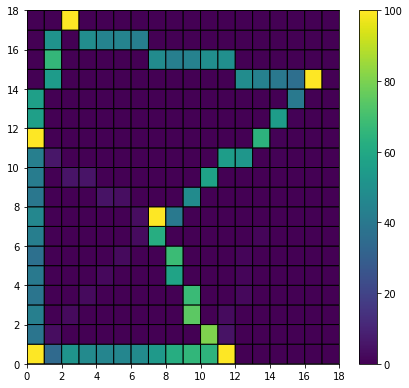

295
Optimal  path Found . Found in 295 s


In [10]:
# Initialise probability variables
alpha = 2
beta  = 3
gamma = 30
t_T = 1000
pdiff  = 0.75
Nants  = 50

# Initialising grid
grd_x= 18
grd_y= 18
grid = np.zeros([grd_y,grd_x])

# Initialising pheromone variables
phero   = 1
pmax    = 100

# Initialising time variables
dt  = 0.001
t   = 0

solution = 'null'
solved = False
tol = 0.9

# Initialising sites, node positions in form (y,x)
nd0 = (0,0)
nd1 = (11,0)
nd2 = (0,11)
nd3 = (7,7)
nd4 = (14,16)
nd5 = (17,2) 

# Setting up array of node and edges to intialise sites
loc   = (nd0, nd1, nd2, nd3, nd4, nd5)
links = ('node0_1', 'node0_2', 'node0_3', 'node1_3', 'node1_4', 'node1_5', 'node2_3', 'node2_4', 'node3_4', 'node3_5',
          'node3_5', 'node4_5')

# Call function to set up sites
sites = graph(loc, links)

# Initialise paths to check solution
correct_path = (sites['node0']['node1'][1:-1] + sites['node1']['node5'][1:-1] + sites['node5']['node4'][1:-1] +
                sites['node4']['node3'][1:-1] + sites['node3']['node2'][1:-1] + sites['node2']['node0'][1:-1])

other_path =  ( sites['node3']['node0'][1:-1] + sites['node3']['node1'][1:-1] +  sites['node3']['node5'][1:-1] 
              + sites['node2']['node4'][1:-1] + sites['node1']['node4'][1:-1] )


# Setting up ant colony for Nants ants 
for site in sites.keys():
    colony = add_colony_SM(  {}  , Nants, site, sites)

# Setting pheromone on grid for paths in sites 
for site in sites.values():
    for edge in list(site.values())[1:]:
        for i in edge:
            grid[i]= phero

# Set site positions to max pheromone
for site in sites.values():
    grid[site['pos']]= pmax  
    
# Main loop
while t < t_T and solved == False:
    # Counts time
    t += 1
      
    # Adds ant each tick
    colony = add_colony_SM(colony, 5, 'node'+ str(np.random.randint(len(loc))), sites)
    
    # Reduces pheromone level by diffusion rate
    grid *= pdiff   
    
    # Ensures site positions are pheromone max
    for values in sites.values():        
        grid[values['pos']]= pmax 

    # Loops for all ants, n
    for n, ant in colony.items():
        
        # For each node in sites dictonary 
        for node, site in sites.items():
            
            # If ant is at the site
            if ant['pos'] == site['pos']:

                # Removes site from available locations
                if node in ant['sites']: 
                    ant['sites'].remove(node)
                
                # Remove pos from the retrace
                ant['stops'].remove(site['pos'])
                
                # If ant has been all sites
                if len(ant['sites']) == 0:

                    # If its back at the start of its tour, will reset the ant
                    if ant['pos'] == ant['start']:                       
                        # Resets ant variables that changed during tour
                        ant['stops'] = [site['pos']]
                        ant['path']  = (ant['pos'],)
                        ant['sites'] = list (sites.keys())
                        
                         # -1 as next index of path needs to be 0, as this keeps ant in cell to restart tour
                        ant['index'] = -1
                        
                    else:
                        # Retraces steps, retrace path doesn't contain any sites except start
                        # So once set will not re-enter this loop before resetting
                        
                        # Reverse stops visited and add start point at end to create new path
                        retrace= ant['stops'][::-1]
                        retrace.append(ant['start'])
                        
                        # Set path to follow as the retrace
                        ant['path'] = tuple(retrace)
                        ant['pos']  = ant['path'][0]
                        
                        # Reset index for path
                        ant['index'] = 0
                
                # If ant hasn't been all sites
                else:
                    # Picks next path
                    nxt_path = path_choice_SM(site, ant, grid, alpha, beta, gamma)
                    
                    # Set ants new path and position and adds the pos to stops list
                    ant['path'] = site[nxt_path]
                    ant['pos']  = site[nxt_path][1]
                    ant['stops']. append(ant['pos'])
                    
                    # Set path index
                    ant['index'] = 1                
                    
        # Ants not at node follow there path    
        # Loops to next path index
        ant['index'] += 1
        
        # Update ant position to the next index position, and adds the pos to stops list
        ant['pos'] = ant['path'][ant['index']]
        ant['stops'].append(ant['pos'])
        
        # Updates pheromone, limit to max level when retracing
        if grid[ ant['pos']]< pmax and len(ant['sites']) == 0 :
            grid[ ant['pos']]+= phero 
                    
    clear_output(wait=True)
    
    # Updates plot
    fig, ax= plt.subplots(1, 1, figsize=(7,6.5)) 
    im= ax.pcolor(grid, edgecolors='k', linewidths=1, vmin=0, vmax= pmax)
    cbar= fig.colorbar(im) 
    
    plt.draw()
    plt.pause(dt)
    print(t)
    
    # Finds density over correct path and grid 
    density_c = sum( map(lambda x: grid[x], correct_path)) / len(correct_path)
    density_o = sum( map(lambda x: grid[x], other_path  )) / len(other_path)
    density_T = density_c + density_o
    
    # print(density_c, density_o, density_c/density_T)
    
    # If the density is above threeshold/ tolerence set, simulation is stopped
    if density_c/density_T > tol and density_c > pmax*0.5 :
        solved   = True
        solution = 'Found'

print('Optimal  path' ,solution, '. Found in',t,'s') 

### TSP code functionalised for loops:

In [13]:
# 15/03/21

def TSP_optimise(pdiff, t_T, Nants, alpha, beta ,gamma):

    # Initialising grid
    grd_x= 18
    grd_y= 18
    grid = np.zeros([grd_y,grd_x])

    # Initialising pheromone variables
    phero   = 1
    pmax    = 100

    # Initialising time variables
    dt  = 0.001
    t   = 0

    solution = 'null'
    solved = False
    tol = 0.9

    # Initialising sites, node positions in form (y,x)
    nd0 = (0,0)
    nd1 = (11,0)
    nd2 = (0,11)
    nd3 = (7,7)
    nd4 = (14,16)
    nd5 = (17,2) 

    # Setting up array of node and edges to intialise sites
    loc   = (nd0, nd1, nd2, nd3, nd4, nd5)
    links = ('node0_1', 'node0_2', 'node0_3', 'node1_3', 'node1_4', 'node1_5', 'node2_3', 'node2_4', 'node3_4', 
             'node3_5', 'node3_5', 'node4_5')

    # Call function to set up sites
    sites = graph(loc, links)

    # Initialise values
    correct_path = (sites['node0']['node1'][1:-1] + sites['node1']['node5'][1:-1] + sites['node5']['node4'][1:-1] +
                    sites['node4']['node3'][1:-1] + sites['node3']['node2'][1:-1] + sites['node2']['node0'][1:-1])

    other_path =  ( sites['node3']['node0'][1:-1] + sites['node3']['node1'][1:-1] +  sites['node3']['node5'][1:-1] 
                  + sites['node2']['node4'][1:-1] + sites['node1']['node4'][1:-1] )


    # Setting up ant colony for Nants ants 
    for site in sites.keys():
        colony = add_colony_SM(  {}  , Nants, site, sites)

    # Setting pheromone on grid for paths in sites 
    for site in sites.values():
        for edge in list(site.values())[1:]:
            for i in edge:
                grid[i]= phero

    # Set site positions to max pheromone
    for site in sites.values():
        grid[site['pos']]= pmax  

    # Main loop
    while t < t_T and solved == False:
        # Counts time
        t += 1

        # Adds ant each tick
        colony = add_colony_SM(colony, 5, 'node'+ str(np.random.randint(len(loc))), sites)

        # Reduces pheromone level by diffusion rate
        grid *= pdiff   

        # Ensures site positions are pheromone max
        for values in sites.values():        
            grid[values['pos']]= pmax 

        # Loops for all ants, n
        for n, ant in colony.items():

            # For each node in sites dictonary 
            for node, site in sites.items():

                # If ant is at the site
                if ant['pos'] == site['pos']:

                    # Removes site from available locations
                    if node in ant['sites']: 
                        ant['sites'].remove(node)

                    # Remove pos from the retrace
                    ant['stops'].remove(site['pos'])

                    # If ant has been all sites
                    if len(ant['sites']) == 0:

                        # If its back at the start of its tour, will reset the ant
                        if ant['pos'] == ant['start']:                       
                            # Resets ant variables that changed during tour
                            ant['stops'] = [site['pos']]
                            ant['path']  = (ant['pos'],)
                            ant['sites'] = list (sites.keys())

                             # -1 as next index of path needs to be 0, as this keeps ant in cell to restart tour
                            ant['index'] = -1

                        else:
                            # Retraces steps, retrace path doesn't contain any sites except start
                            # So once set will not re-enter this loop before resetting

                            # Reverse stops visited and add start point at end to create new path
                            retrace= ant['stops'][::-1]
                            retrace.append(ant['start'])

                            # Set path to follow as the retrace
                            ant['path'] = tuple(retrace)
                            ant['pos']  = ant['path'][0]

                            # Reset index for path
                            ant['index'] = 0

                    # If ant hasn't been all sites
                    else:
                        # Picks next path
                        nxt_path = path_choice_SM(site, ant, grid, alpha, beta, gamma)

                        # Set ants new path and position and adds the pos to stops list
                        ant['path'] = site[nxt_path]
                        ant['pos']  = site[nxt_path][1]
                        ant['stops']. append(ant['pos'])

                        # Set path index
                        ant['index'] = 1                

            # Ants not at node follow there path    
            # Loops to next path index
            ant['index'] += 1

            # Update ant position to the next index position, and adds the pos to stops list
            ant['pos'] = ant['path'][ant['index']]
            ant['stops'].append(ant['pos'])

            # Updates pheromone, limit to max level when retracing
            if grid[ ant['pos']]< pmax and len(ant['sites']) == 0 :
                grid[ ant['pos']]+= phero 

        density_c = sum( map(lambda x: grid[x], correct_path)) / len(correct_path)
        density_o = sum( map(lambda x: grid[x], other_path  )) / len(other_path)
        density_T = density_c + density_o

        # print(density_c, density_o, density_c/density_T)

        if density_c/density_T > tol and density_c > pmax*0.5 :
            solved   = True
            solution = 'Found'

    return solution, t, grid

### Optimised values:
- Test the percentage success of optimisation

In [14]:
# 15/03/21
# Runs test on optimal values found for tsp problem 
results= np.zeros([100,2], dtype=object)

for i in range(100): 
    solution, t, grid    = TSP_optimise( 0.9, 1000, 50, 3.3, 3.1, 30)
    results[i]  = [t, solution]
    
    
    clear_output()
    print(i)

success=[]
for i in range(100):
    if results[i,1] == 'Found':
        success.append(results[i])
           
print( len(success)/100)

99
0.83


In [ ]:
# 15/03/21

#Test optimal values for simple solution

# Initialise variables for function
x0, y0, grd_x, grd_y, phero, pmax, pdiff, pdeprss, t_T, tol, Nants, add_ants =(
    40, 40, 41, 41, 1, 100, 0.9, 1.89*40, 500, 0.9, 30, 1)

# Inititalise array to hold solutions
results2 = 0
success_percent=0

# Loop for N_alpha sims.
for i in range(1000):
        
    # Runs for set alpha 
    solved, solution, t, grid = AntOptimisation(
        x0, y0, grd_x, grd_y, phero, pmax, pdiff, pdeprss, t_T, tol, Nants, add_ants)
    
    # Store results
    results2 += t

    if solution == 'short':
        success_percent+=1
        
    clear_output()
    print(i)    
    

In [22]:
print(success_percent/1000)

0.977
